In [32]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [1]:
data = pd.read_csv("C:/Users/bwozn/Documents/DataScience/MLNano/machine-learning/projects/post_capstone/cs-training.csv")
data = data.rename(index=str, columns={"NumberOfTime30-59DaysPastDueNotWorse":"Thirty", "NumberOfTime60-89DaysPastDueNotWorse":"Sixty"})

In [2]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,Thirty,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,Sixty,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
explore = data.drop(['Unnamed: 0', 'age', 'NumberOfDependents'], axis = 1)

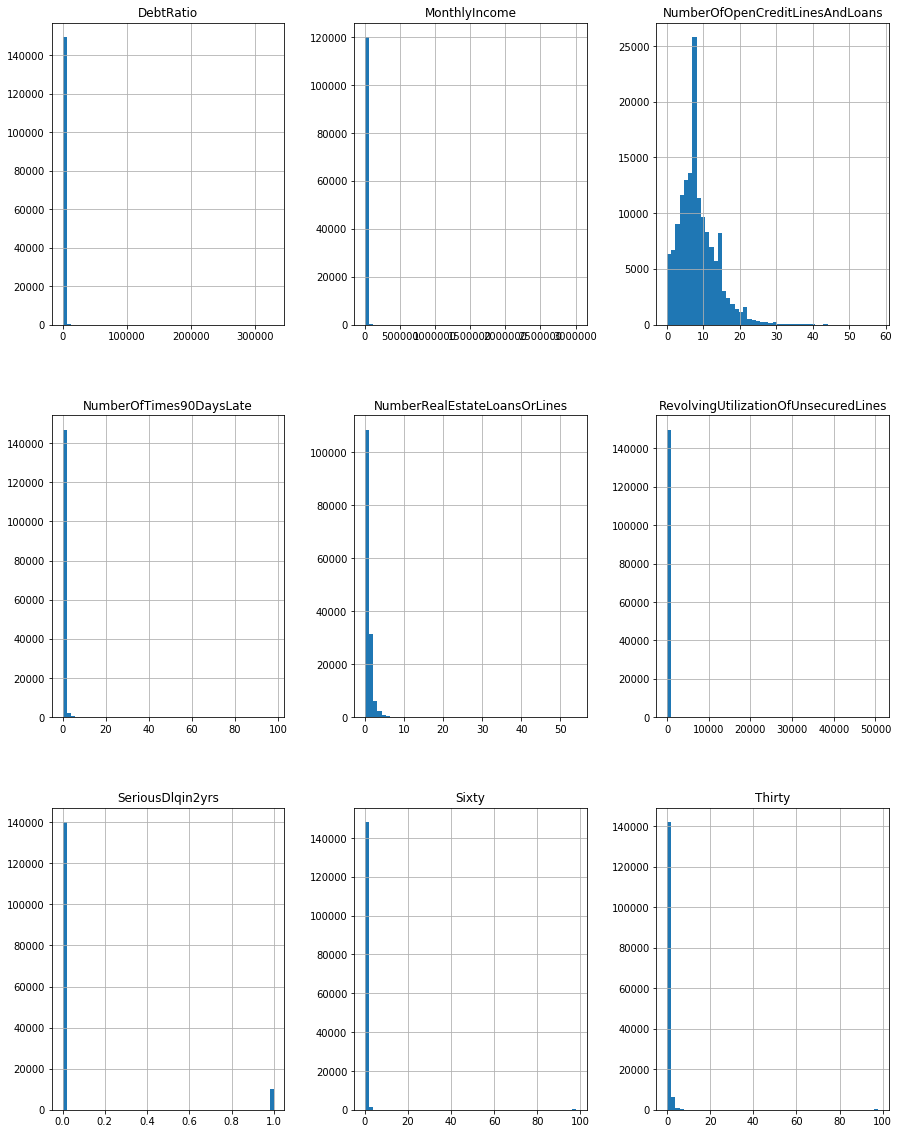

In [12]:
explore.hist(figsize = (15,20), bins = 50)
plt.show()

#https://mode.com/example-gallery/python_histogram/
#https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/

Text(0.5,1,'Serious Delinquency in the Next 2 Years')

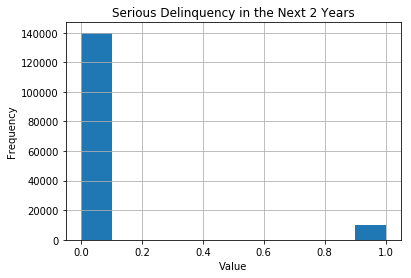

In [107]:
explore.hist(column = 'SeriousDlqin2yrs')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Serious Delinquency in the Next 2 Years')

In [6]:
explore.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Thirty,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,Sixty
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [7]:
data["SeriousDlqin2yrs"].value_counts()
#https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [8]:
data.shape
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html

(150000, 12)

In [9]:
#class balance

10026/139974

0.07162758798062498

In [10]:
list(data)
#https://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'Thirty',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'Sixty',
 'NumberOfDependents']

In [3]:
#Fill in missing values with the median

exp_fill = explore.fillna(explore.median())

In [14]:
#Perform MinMaxScalar on all features using a feature range of (0,1)
                              
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html

explore_s = exp_fill.transform(lambda x: ((x - x.min()) / (x.max() - x.min())))

In [13]:
explore_s.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Thirty,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,Sixty
count,150000.000000,1.500000e+05,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,1.192798e-04,0.004296,1.070803e-03,0.002133,0.145737,0.002714,0.018856,0.002453
std,0.249746,4.925364e-03,0.042783,6.181502e-03,0.004284,0.088723,0.042544,0.020922,0.042400
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.890085e-07,0.000000,5.310675e-07,0.001297,0.086207,0.000000,0.000000,0.000000
50%,0.000000,3.040560e-06,0.000000,1.111762e-06,0.001795,0.137931,0.000000,0.018519,0.000000
75%,0.000000,1.102481e-05,0.000000,2.633754e-06,0.002459,0.189655,0.000000,0.037037,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
explore_s.mode(axis = 0)

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Thirty,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,Sixty
0,0.0,0.0,0.0,0.0,0.001795,0.103448,0.0,0.0,0.0


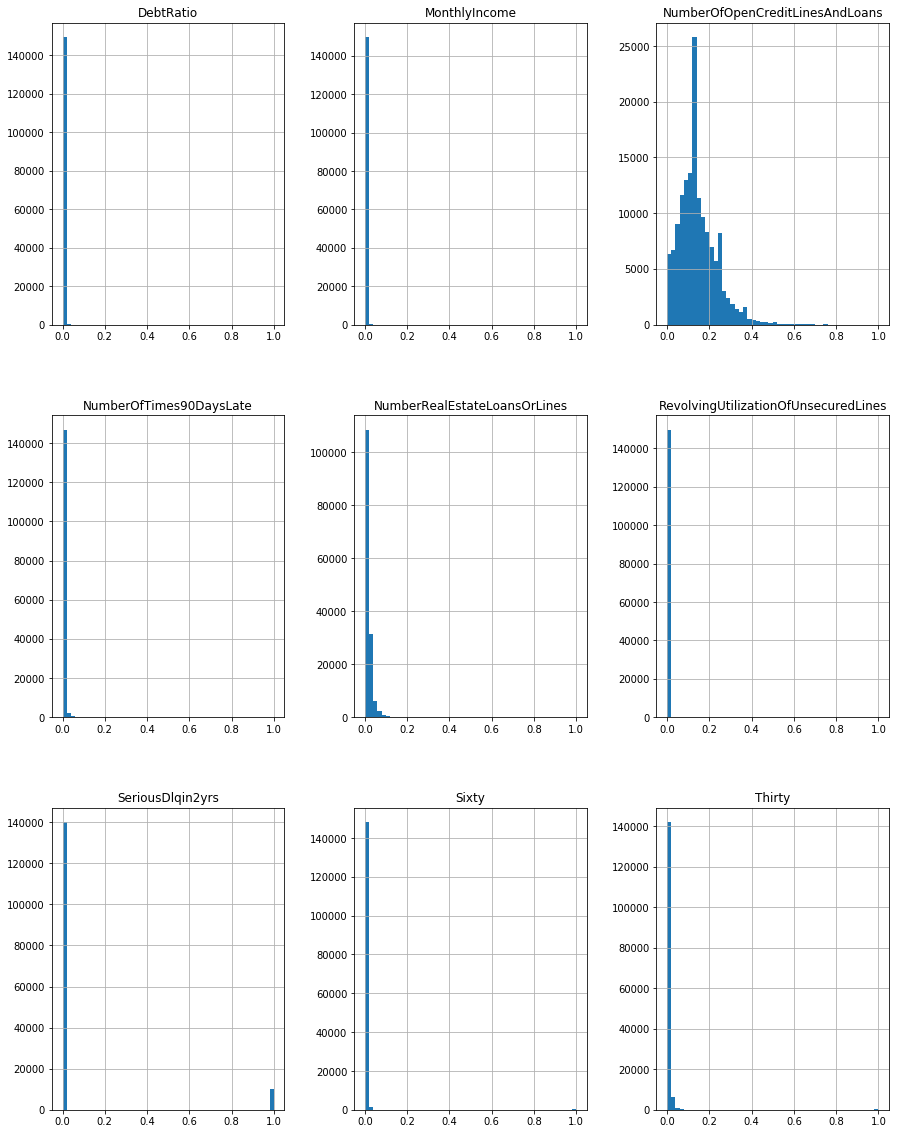

In [15]:
explore_s.hist(figsize = (15,20), bins = 50)
plt.show()

In [15]:
target = explore_s['SeriousDlqin2yrs']
features = explore_s.drop('SeriousDlqin2yrs', axis = 1)

#https://stackoverflow.com/questions/40389018/dropping-multiple-columns-from-a-data-frame-using-python

In [17]:
#Perform Yeo-Johnson Transform on all variables

pt = PowerTransformer()

for var in features.columns.get_values().tolist():
    features[var] = pt.fit_transform(features[var].values.reshape(-1,1))

#https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.values.html
#https://stackoverflow.com/questions/22889425/replacing-pandas-dataframe-variable-values-with-a-numpy-array
#https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.boxcox.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

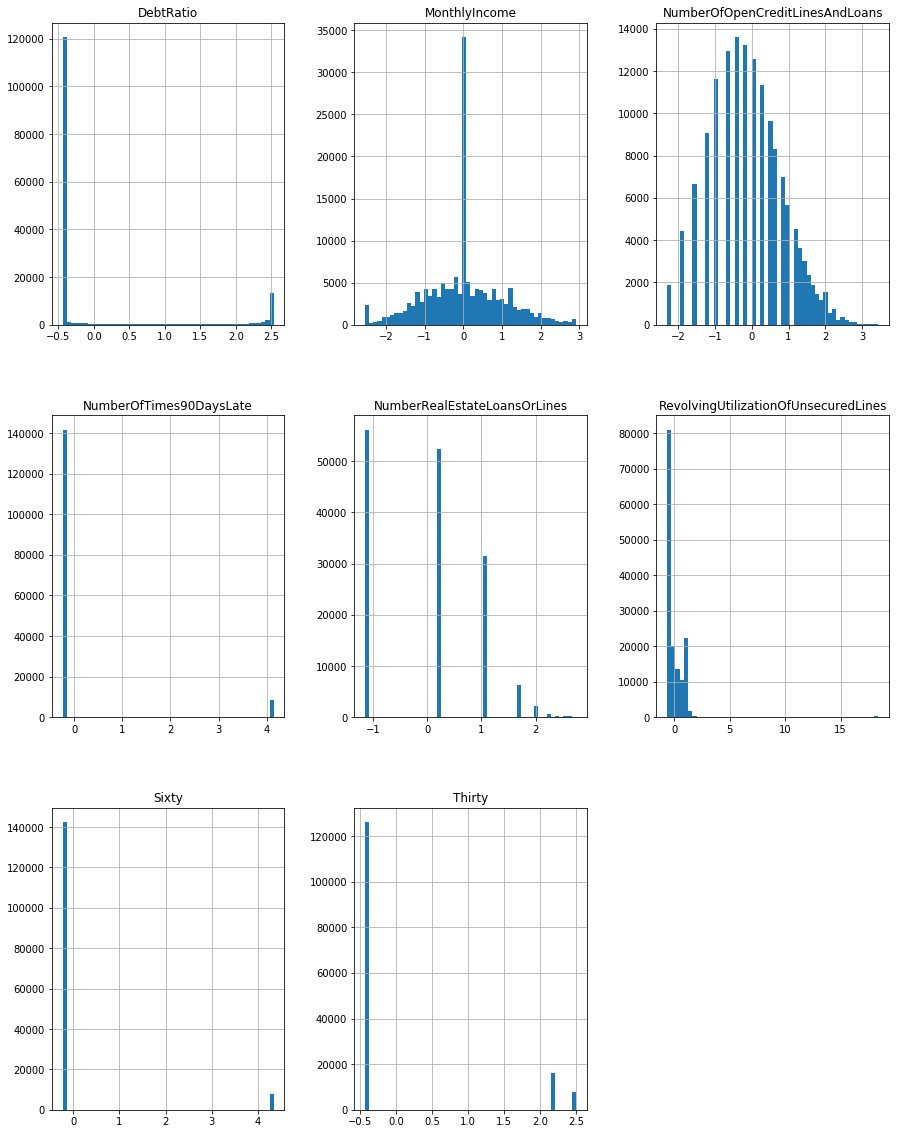

In [18]:
features.hist(figsize=(15,20), bins=50)
plt.show()

In [19]:
#Identify Outliers

outliers = []

for var in features.columns.get_values().tolist():
    
    Q1 = features[var].quantile(.25)
    Q3 = features[var].quantile(.75)
    step = 1.5*(Q3-Q1)
    out = features[~((features[var] >= Q1 - step) & (features[var] <= Q3 + step))].index.values.tolist()
    outliers = outliers + out

#https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-pandas-dataframe-to-run-regression
#https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer/42853445
#https://stackoverflow.com/questions/23748995/pandas-dataframe-to-list
#https://stackoverflow.com/questions/1720421/how-to-concatenate-two-lists-in-python
#https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
#https://github.com/bwozniakhome/MLNano/blob/master/projects/customer_segments/customer_segments.ipynb

In [26]:
#Remove Outliers

from collections import Counter
count = Counter(outliers)

outl = pd.DataFrame.from_dict(count, orient = 'index')
features2 = features.drop(outl[outl[0] >= 4].index.values.tolist())
target2 = target.drop(outl[outl[0] >= 4].index.values.tolist())
features2.shape

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
#https://stackoverflow.com/questions/19883672/frequency-of-all-elements-of-list-in-python

(149482, 8)

In [21]:
features2.head()

,RevolvingUtilizationOfUnsecuredLines,Thirty,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,Sixty
0,0.809837,2.468907,-0.436005,0.996076,1.002387,-0.242604,2.424455,-0.231085
1,1.154267,-0.435593,-0.441238,-1.136471,-0.930818,-0.242604,-1.150935,-0.231085
2,0.612167,2.193131,-0.441521,-0.936140,-1.566370,4.105153,-1.150935,-0.231085
3,-0.186711,-0.435593,-0.441899,-0.823828,-0.648047,-0.242604,-1.150935,-0.231085
4,1.064929,2.193131,-0.441984,2.911364,-0.142527,-0.242604,0.221763,-0.231085


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, target2, test_size = .2, random_state = 42)

In [28]:
#Balance classes using SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [31]:
#Support Vector Machine

model = SVC(random_state = 42, gamma = 'auto')
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [33]:
print(roc_auc_score(y_test, y_pred))

0.7834448434981883


In [91]:
#Improve Model through adjusting parameters by guessing, without cross validation

model1 = SVC(kernel = 'linear', random_state = 42)
model2 = SVC(kernel = 'poly', random_state = 42)
model3 = SVC(kernel = 'sigmoid', random_state = 42)

model1.fit(X_res, y_res)
model2.fit(X_res, y_res)
model3.fit(X_res, y_res)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Report score
print("\nOptimized Model\n------")
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred1)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred2)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred3)))

C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Optimized Model
------
Final ROC auc score on the testing data: 0.7514
Final ROC auc score on the testing data: 0.7700
Final ROC auc score on the testing data: 0.6751


In [82]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state = 42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

model.feature_importances_

C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.26305972, 0.10632413, 0.14338487, 0.14090544, 0.15593802,
       0.10066768, 0.04176564, 0.04795451])

In [83]:
print(roc_auc_score(y_test, y_pred))

0.6350575470411892


In [86]:
X_rest = X_res[:,[0,2,3,4]]
X_test2 = X_test.values[:,[0,2,3,4]]

In [87]:
#Improve Model through adjusting parameters by guessing, without cross validation

model1 = RandomForestClassifier(max_depth = 5, random_state = 42)
model2 = RandomForestClassifier(max_depth = 10, random_state = 42)
model3 = RandomForestClassifier(max_depth = 20, random_state = 42)

model1.fit(X_rest, y_res)
model2.fit(X_rest, y_res)
model3.fit(X_rest, y_res)

y_pred1 = model1.predict(X_test2)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test2)

# Report score
print("\nOptimized Model\n------")
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred1)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred2)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred3)))

C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Optimized Model
------
Final ROC auc score on the testing data: 0.7263
Final ROC auc score on the testing data: 0.7272
Final ROC auc score on the testing data: 0.6801


In [76]:
#Gradient Boosting Machine

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

model.feature_importances_

array([0.46636159, 0.1880819 , 0.01134052, 0.01389186, 0.11838409,
       0.12472344, 0.02843833, 0.04877827])

In [78]:
print(roc_auc_score(y_test, y_pred))

0.7670353005676558


In [74]:
X_rest = X_res[:,[0,1,4,5]]
X_test2 = X_test.values[:,[0,1,4,5]]

#https://stackoverflow.com/questions/8386675/extracting-specific-columns-in-numpy-array
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html#pandas.DataFrame.values

In [79]:
#Improve model through Grid Search - takes too long!

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import make_scorer, roc_auc_score

clf = GradientBoostingClassifier(random_state=42)

parameters = {'min_samples_leaf': [1], 'max_depth': [5, 20]}

scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer, cv = RepeatedKFold(random_state = 42))

grid_fit = grid_obj.fit(X_rest, y_res)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model

best_predictions = best_clf.predict(X_test2)

# Report score
print("\nOptimized Model\n------")
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

#https://github.com/bwozniakhome/MLNano/blob/master/projects/finding_donors/finding_donors.ipynb
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

KeyboardInterrupt: 

In [81]:
#Improve Model through adjusting parameters by guessing, without cross validation

model1 = GradientBoostingClassifier(max_depth = 5, random_state = 42)
model2 = GradientBoostingClassifier(max_depth = 10, random_state = 42)
model3 = GradientBoostingClassifier(max_depth = 20, random_state = 42)

model1.fit(X_rest, y_res)
model2.fit(X_rest, y_res)
model3.fit(X_rest, y_res)

y_pred1 = model1.predict(X_test2)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test2)

# Report score
print("\nOptimized Model\n------")
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred1)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred2)))
print("Final ROC auc score on the testing data: {:.4f}".format(roc_auc_score(y_test, y_pred3)))


Optimized Model
------
Final ROC auc score on the testing data: 0.7068
Final ROC auc score on the testing data: 0.6716
Final ROC auc score on the testing data: 0.6514


In [96]:
def PredictTrials(X, y):
    """ Performs trials of fitting and predicting data. """

    roc = []

    for k in range(5):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = k)
        
        sm = SMOTE(random_state=k)
        X_res, y_res = sm.fit_resample(X_train, y_train)
        
        # Fit the data
        svm = SVC(random_state = k)
        svm.fit(X_res, y_res)
        
        # Make a prediction
        y_pred = svm.predict(X_test)
        score = roc_auc_score(y_test, y_pred)
        roc.append(score)
        
        # Result
        print("Trial {}: {}".format(k+1, score))
    
#https://github.com/bwozniakhome/MLNano/blob/master/projects/boston_housing/visuals.py

In [97]:
PredictTrials(features, target)

C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trial 1: 0.7839114765337971


C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trial 2: 0.7795393880745919


C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trial 3: 0.7785599216883201


C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trial 4: 0.7818296305891271


C:\Users\bwozn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trial 5: 0.7719544742879089


Text(0.5,1,'Sensitivity')

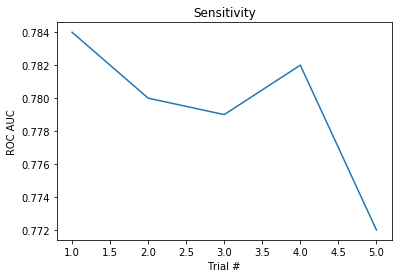

In [101]:
plt.plot([1,2,3,4,5], [0.784, 0.780, 0.779, 0.782, 0.772])
plt.ylabel('ROC AUC')
plt.xlabel('Trial #')
plt.title('Sensitivity')

#https://matplotlib.org/users/pyplot_tutorial.html